## Linear Regression
- y = theta(1)X + theta(0)
- theta(1) and theta(0) are coefficients
- MSE (Mean squared error)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


np.random.randn: samples from normal standard distribution

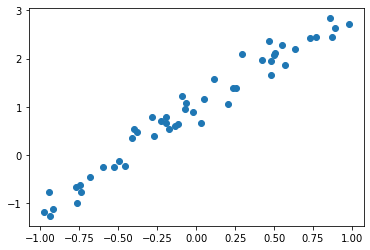

In [2]:
# generate a linear looking dataset
m = 50 # number of points
x = -1 + 2*np.random.rand(m,1) # uniform distribution over [-1,1]
y = 2*x+1+0.25*np.random.randn(m,1)
plt.scatter(x,y)

In [3]:
# linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)



LinearRegression()

In [4]:
# look at coefficients
print(lin_reg.coef_) # this is theta(1)

lin_reg.intercept_ # this is theta(0)

[[2.05763541]]


array([0.97789867])

In [5]:
# predictions
x_new = [[-0.5],[0.25],[1.5]]
lin_reg.predict(x_new)

array([[-0.05091903],
       [ 1.49230753],
       [ 4.06435178]])

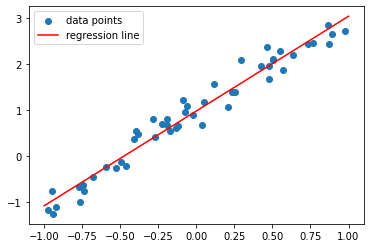

In [6]:
# plot regression line
m_plot = 100
x_plot = np.linspace(-1,1,m_plot) # m_plot points on interval [-1,1] evenly spaced
x_plot = x_plot.reshape(m_plot,1) # reshape to be 1 column
y_plot = lin_reg.predict(x_plot)

plt.scatter(x,y,label='data points')
plt.plot(x_plot,y_plot,label='regression line', color='red')
plt.legend()

## forecasting weekly covid deths 6 weeks into future


In [7]:
path = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv'
covid = pd.read_csv(path, index_col='date', parse_dates=True)
covid.head(3)

,cases,deaths
date,,
2020-01-21,1,0
2020-01-22,1,0
2020-01-23,1,0


<AxesSubplot:xlabel='date'>

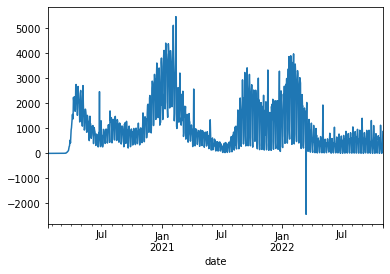

In [8]:
covid.deaths.diff().plot() # daily deaths

In [9]:
covid = covid.diff()['10-01-2020':].resample('w').sum() # get weekly number of cases/deaths


<AxesSubplot:xlabel='date'>

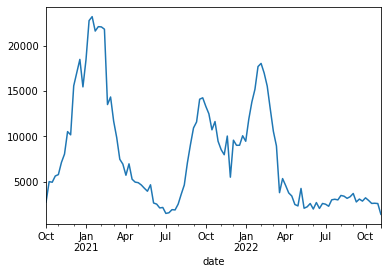

In [10]:
covid.deaths.plot()

In [11]:
trends = pd.read_csv('Google Trends 2.csv',index_col='Week',parse_dates=True, skiprows=2)
trends

,covid symptoms: (United States)
Week,
2020-10-04,48
2020-10-11,39
2020-10-18,42
2020-10-25,48
2020-11-01,44
...,...
2022-09-11,14
2022-09-18,13
2022-09-25,11


In [12]:
covid['google_searches'] = trends['covid symptoms: (United States)'] # combine data
covid

,cases,deaths,google_searches
date,,,
2020-10-04,182840.0,2754.0,48.0
2020-10-11,370067.0,5000.0,39.0
2020-10-18,398722.0,4935.0,42.0
2020-10-25,488992.0,5623.0,48.0
2020-11-01,579846.0,5776.0,44.0
...,...,...,...
2022-10-09,283167.0,2929.0,11.0
2022-10-16,263775.0,2601.0,NaN
2022-10-23,246850.0,2619.0,NaN


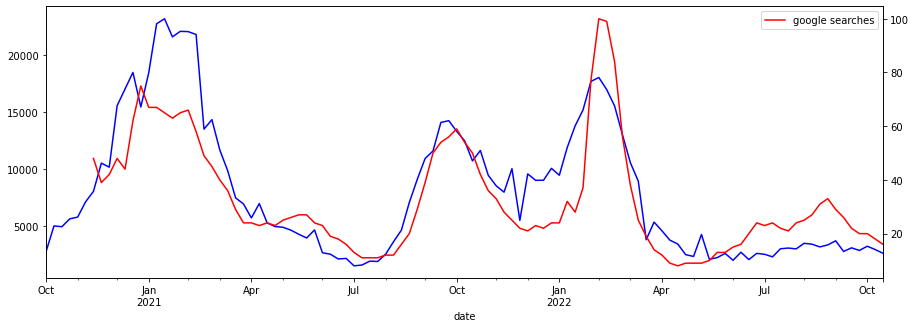

In [65]:
fig, ax = plt.subplots(figsize=(15,5))

covid.deaths.plot(ax=ax, label='covid deaths', color='blue')
covid.google_searches.shift(6).plot(ax=ax.twinx(),label='google searches', color='red') # shift 6 weeks ahead to match better
plt.legend()

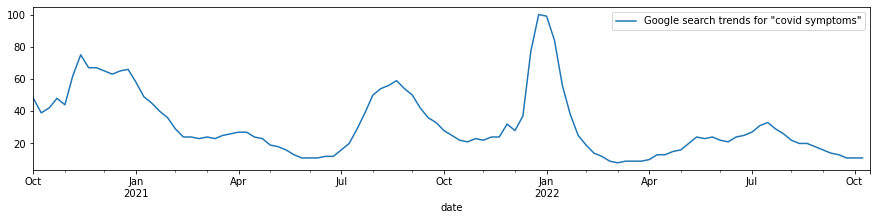

In [56]:
covid.google_searches.plot(figsize=(15,3),label='Google search trends for "covid symptoms"')
plt.legend()

In [113]:
covid['google_searches_6weeks_shift'] = covid.google_searches.shift(6)
covid.dropna(axis=0,inplace=True)

In [114]:
# linear regression

y = covid.deaths
X = covid[['google_searches_6weeks_shift']]
linreg = LinearRegression()
linreg.fit(X,y)
covid['prediction'] = linreg.predict(X)

<AxesSubplot:xlabel='date'>

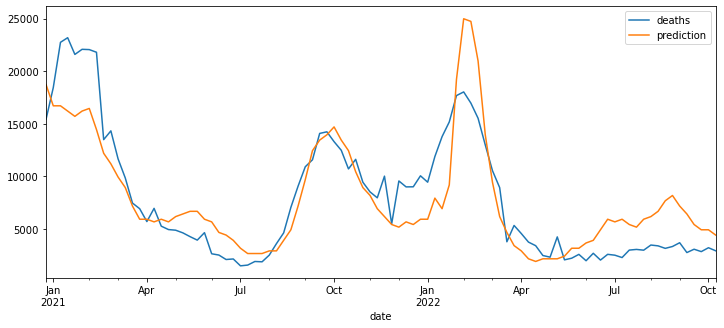

In [118]:
covid[['deaths', 'prediction']].plot(figsize=(12,5))

In [73]:
# last date
last_date = covid.index[-1]
last_date

Timestamp('2022-10-16 00:00:00', freq='W-SUN')

In [76]:
# next 6 dates
new_dates = [last_date + i*pd.Timedelta(7,'days') for i in range(7)]
new_dates

[Timestamp('2022-10-16 00:00:00', freq='W-SUN'),
 Timestamp('2022-10-23 00:00:00', freq='W-SUN'),
 Timestamp('2022-10-30 00:00:00', freq='W-SUN'),
 Timestamp('2022-11-06 00:00:00', freq='W-SUN'),
 Timestamp('2022-11-13 00:00:00', freq='W-SUN'),
 Timestamp('2022-11-20 00:00:00', freq='W-SUN'),
 Timestamp('2022-11-27 00:00:00', freq='W-SUN')]

In [79]:
last_7weeks = covid[['google_searches']].iloc[-7:]
last_7weeks.index = new_dates
last_7weeks

,google_searches
2022-10-16,16.0
2022-10-23,14.0
2022-10-30,13.0
2022-11-06,11.0
2022-11-13,11.0
2022-11-20,11.0
2022-11-27,NaN


In [117]:

last_7weeks['forecast'] = linreg.predict(last_7weeks)
last_7weeks = 0

C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- google_searches
Feature names seen at fit time, yet now missing:
- google_searches_6weeks_shift

  warnings.warn(message, FutureWarning)


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

KeyError: "['prediction'] not in index"

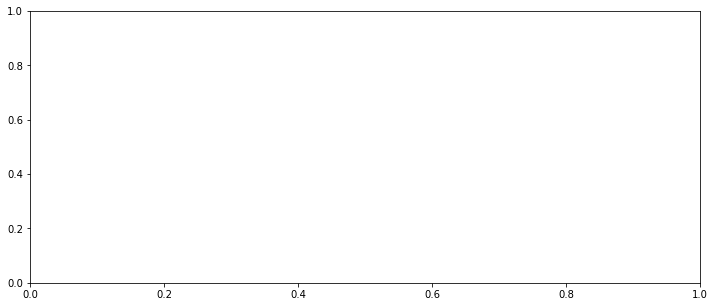

In [82]:
fig, ax = plt.subplots(figsize=(12,5))
covid[['deaths', 'prediction']].plot(ax=ax)
last_7weeks.forecast.plot(ax=ax, color='red')

<AxesSubplot:xlabel='google_searches_shift6', ylabel='deaths'>

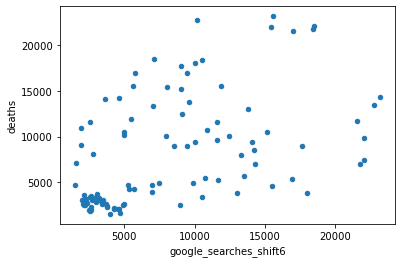

In [89]:
covid['google_searches_shift6'] = covid.deaths.shift(6)

covid.plot.scatter(x='google_searches_shift6', y='deaths')

# Adding polynomial features

In [90]:
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.pipeline import Pipeline

In [93]:
pipe = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('reg', LinearRegression())
])
pipe

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('poly_features', PolynomialFeatures()),
                ('reg', LinearRegression())])

In [108]:
X = last_7weeks[['google_searches']].head(6)
X
#pipe.fit(X,y) #setup X and y later
#covid['prediction_poly'] = pipe.predict(X)

ValueError: Found input variables with inconsistent numbers of samples: [6, 50]